In [19]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv("iris.csv")
df = df.drop(["Species", "Id"], axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

In [21]:
model = KMeans(n_clusters=3,random_state=1)
model.fit(X)
print("Centroids:\n " , model.cluster_centers_)


Centroids:
  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [22]:
y = model.predict(X)
print("Labels of each flower according to our KMeans model: \n", y)


Labels of each flower according to our KMeans model: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [23]:
df["clusters"] = y
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


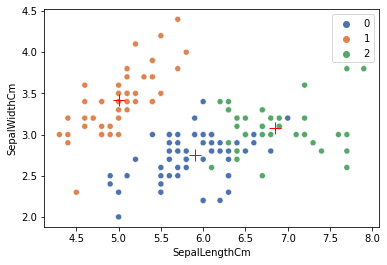

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

centroids = pd.DataFrame({'x':  model.cluster_centers_[:, 0], 'y':  model.cluster_centers_[:, 1]})

sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=y, palette="deep")
sns.scatterplot(x = centroids['x'], y=centroids['y'], color = "red", marker = "+", s=150)
plt.show()